In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('midfielders_rating_saves_X.csv')
y = pd.read_csv('midfielders_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0             0.0        0.0        0.0      1.0            0.0         0.0   
1             0.0        0.0        0.0      0.0            0.0         0.0   
2             0.0        0.0        0.0      0.0            0.0         0.0   
3             1.0        0.0        0.0      0.0            0.0         0.0   
4             0.0        1.0        0.0      0.0            0.0         0.0   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  minutesPlayed  \
0          0.0          0.0            0.0      0.027027  ...       0.014493   
1          1.0          0.0            0.0      0.108108  ...       0.082126   
2          1.0          0.0            0.0      0.054054  ...       0.000000   
3          0.0          0.0            0.0      0.027027  ...       0.014493   
4          0.0          0.0            0.0      0.054054  ...       0.000000   

   pos_role_AMC  pos_role_AML  pos_role_AMR 

In [4]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'lballs_acc', 'lballs_inacc', 'missed_penalties', 'offsides',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'rcards',
       'saves_otb', 'shots_offtarget', 'shots_ontarget', 'shotsblocked',
       'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc', 'touches',
       'wasfouled', 'ycards', 'degree_centrality', 'betweenness_centrality',
       'closeness_centrality', 'flow_centrality', 'betweenness2goals',
       'game_duration', 'flow_success', 'minutesPlayed', 'pos_role_AMC',
       'pos_role_AML', 'pos_role_AMR', 'pos_role_DMC', 'pos_role_DML',
       'pos_role_DMR', 'pos_role_MC', 'pos_role_ML', 'pos_role_MR'],
      dtype='object')

In [5]:
X.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,...,minutesPlayed,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMC,pos_role_DML,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.027027,...,0.014493,0.00000,0.583851,0.569942,0.373249,0.273340,0.000000,0.0,0.524806,0.474830
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.108108,...,0.082126,0.00000,0.798938,0.632860,0.617663,0.678760,0.028235,0.0,0.565281,0.714286
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.054054,...,0.000000,0.21875,0.778930,0.576117,0.598604,0.680354,0.038710,0.0,0.473373,0.588571
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,...,0.014493,0.00000,0.633540,0.432091,0.559315,0.573836,0.000000,0.0,0.444752,0.640816
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054054,...,0.000000,0.00000,0.616601,0.571131,0.477619,0.309173,0.000000,0.0,0.341717,0.693506


In [6]:
y.head()

,keypasses
0,0
1,7
2,0
3,13
4,4


In [7]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['betweenness_centrality',
 'degree_centrality',
 'drib_unsuccess',
 'flow_centrality',
 'flow_success',
 'game_duration',
 'interceptions',
 'minutesPlayed',
 'missed_penalties',
 'offsides',
 'owngoals',
 'passes_inacc',
 'pos_role_DMC',
 'pos_role_DML',
 'poss_lost',
 'rcards',
 'saves_otb',
 'shots_offtarget',
 'tackles',
 'tballs_acc',
 'tballs_inacc',
 'ycards'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0             0.0        0.0        0.0      1.0            0.0         0.0   
1             0.0        0.0        0.0      0.0            0.0         0.0   
2             0.0        0.0        0.0      0.0            0.0         0.0   
3             1.0        0.0        0.0      0.0            0.0         0.0   
4             0.0        1.0        0.0      0.0            0.0         0.0   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  wasfouled  \
0          0.0          0.0            0.0      0.027027  ...        0.0   
1          1.0          0.0            0.0      0.108108  ...        0.0   
2          1.0          0.0            0.0      0.054054  ...        0.0   
3          0.0          0.0            0.0      0.027027  ...        0.0   
4          0.0          0.0            0.0      0.054054  ...        0.0   

   closeness_centrality  betweenness2goals  pos_role_AMC  pos_role_A

## Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 564
Validation set size: 189
Test set size: 189


In [10]:
X_train.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,...,wasfouled,closeness_centrality,betweenness2goals,pos_role_AMC,pos_role_AML,pos_role_AMR,pos_role_DMR,pos_role_MC,pos_role_ML,pos_role_MR
869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.027027,...,0.0,0.000000,0.086957,0.00000,0.789855,0.381716,0.000000,0.500000,0.333186,0.857143
92,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.081081,...,0.0,0.000000,0.000000,0.00000,0.630435,0.355962,0.030612,0.214286,0.352210,0.522449
157,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.054054,...,0.0,0.000000,0.000000,0.21875,0.675920,0.586686,0.000000,0.400000,0.276237,0.805714
268,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324324,...,0.0,0.066667,0.000000,0.06250,0.481707,0.361182,0.034711,0.000000,0.293356,0.615152
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.702703,...,0.0,0.000000,0.271739,0.09375,0.622138,0.426559,0.081390,0.000000,0.486132,0.689286


In [11]:
X_val.shape

(189, 33)

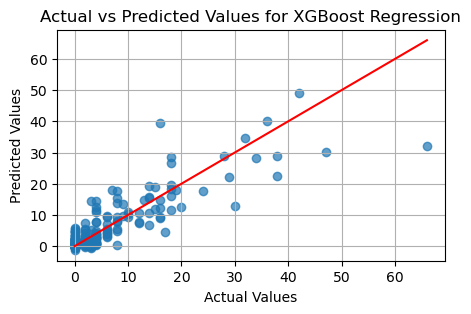

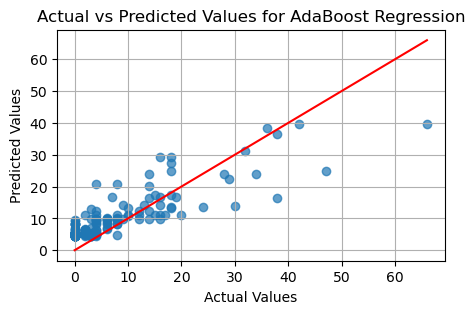

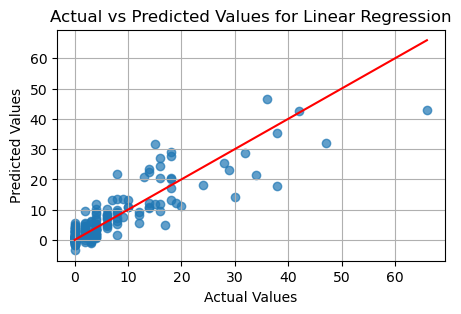

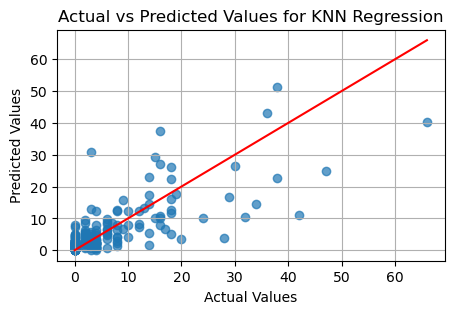

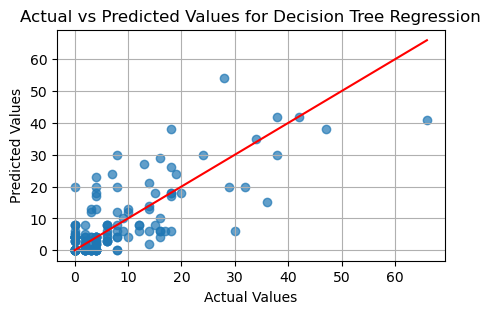

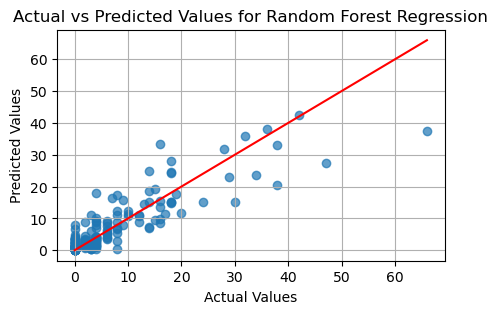

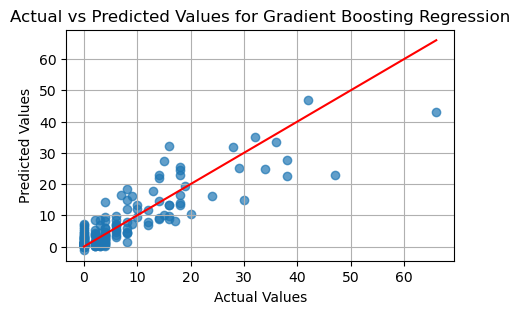

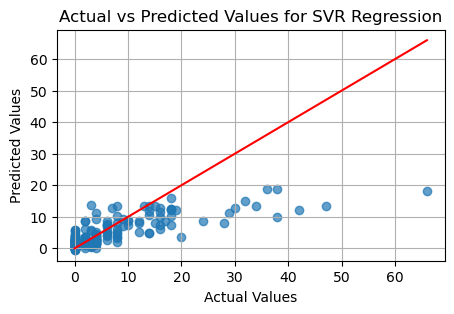

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


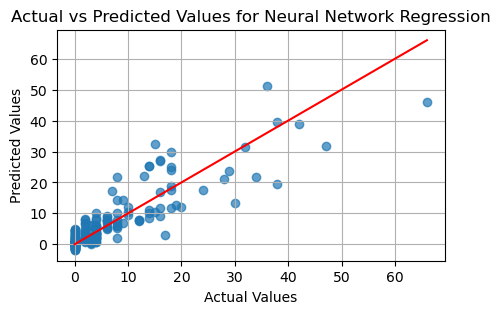

                          Model       MSE     RMSE       R2      MAE        R
0            XGBoost Regression  26.13056  5.11181  0.73497  3.02091  0.85775
1           AdaBoost Regression  35.94044  5.99503  0.63548  4.78543  0.86351
2             Linear Regression  22.42679  4.73569  0.77254  3.00364  0.87979
3                KNN Regression  44.58836  6.67745  0.54777  4.00000  0.74523
4      Decision Tree Regression  43.89947  6.62567  0.55475  3.94180  0.77855
5      Random Forest Regression  22.57162  4.75096  0.77107  2.83751  0.87872
6  Gradient Boosting Regression  22.47316  4.74059  0.77207  3.00973  0.87879
7                SVR Regression  52.54978  7.24912  0.46702  3.79905  0.78109
8     Neural Network Regression  23.51601  4.84933  0.76149  3.03684  0.87505


In [12]:
# Features after removing correlated features, using base model, evaluation on val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()


# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name, 
        'MSE': f'{mse:.5f}', 
        'RMSE': f'{rmse:.5f}', 
        'R2': f'{r2:.5f}', 
        'MAE': f'{mae:.5f}',
        'R': f'{r:.5f}'
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


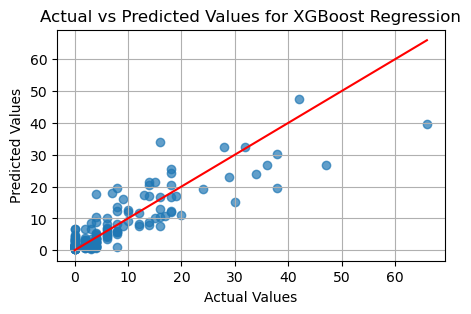

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.1, 'n_estimators': 100}


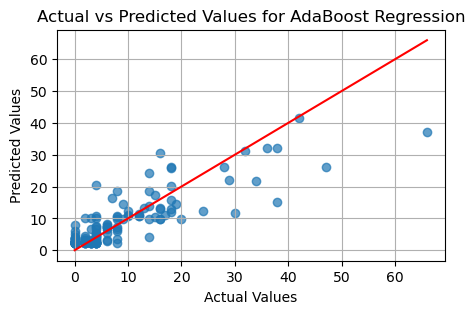

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


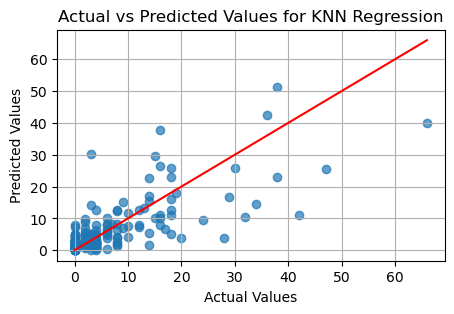

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 20}


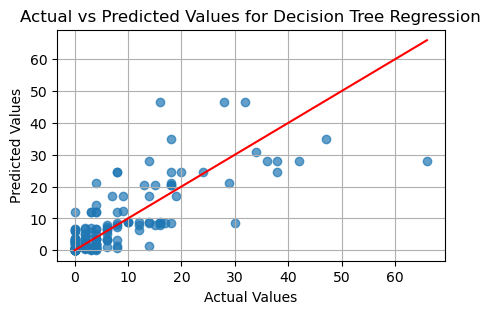

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


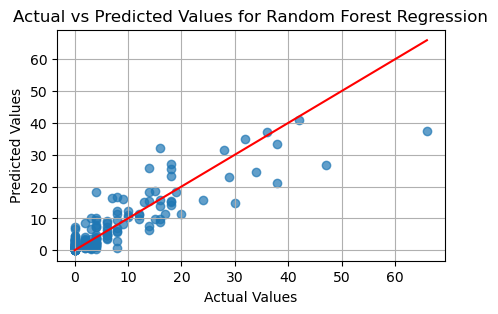

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


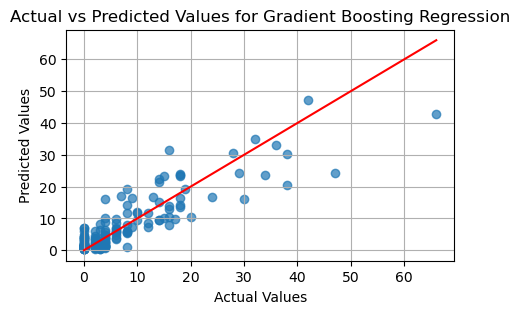

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


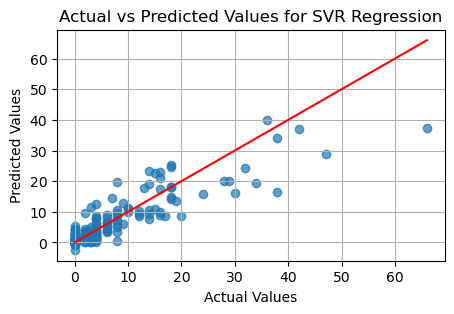

Training Neural Network Regression...
Best parameters for Neural Network Regression: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


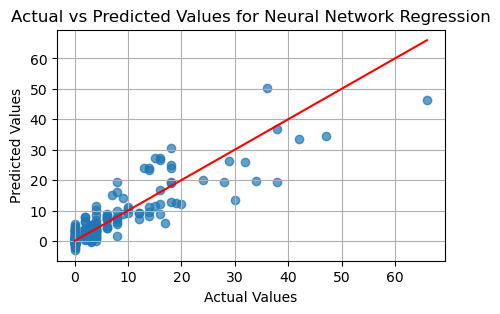

                          Model        MSE       MAE        R2      RMSE
0            XGBoost Regression  22.403886  2.934415  0.772770  4.733274
1           AdaBoost Regression  26.071994  3.267251  0.735566  5.106074
2                KNN Regression  44.476483  3.987835  0.548900  6.669069
3      Decision Tree Regression  41.699934  3.745092  0.577061  6.457549
4      Random Forest Regression  21.992793  2.800880  0.776939  4.689647
5  Gradient Boosting Regression  21.066304  2.893998  0.786336  4.589804
6                SVR Regression  21.779354  2.768304  0.779104  4.666836
7     Neural Network Regression  22.114364  3.005592  0.775706  4.702591


In [13]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model      RMSE        MSE       MAE        R2  \
0            XGBoost Regression  5.088127  25.889032  3.023758  0.791539   
1           AdaBoost Regression  5.319337  28.295347  3.622536  0.772163   
2                KNN Regression  8.291898  68.755571  4.498916  0.446373   
3      Decision Tree Regression  5.386263  29.011831  3.374096  0.766394   
4      Random Forest Regression  5.106310  26.074403  3.099235  0.790046   
5  Gradient Boosting Regression  5.078732  25.793519  3.118384  0.792308   
6                SVR Regression  5.148783  26.509965  2.941889  0.786539   
7     Neural Network Regression  5.190336  26.939585  3.340377  0.783080   

          R  
0  0.907375  
1  0.890112  
2  0.688233  
3  0.877306  
4  0.895958  
5  0.909061  
6  0.903102  
7  0.892254  


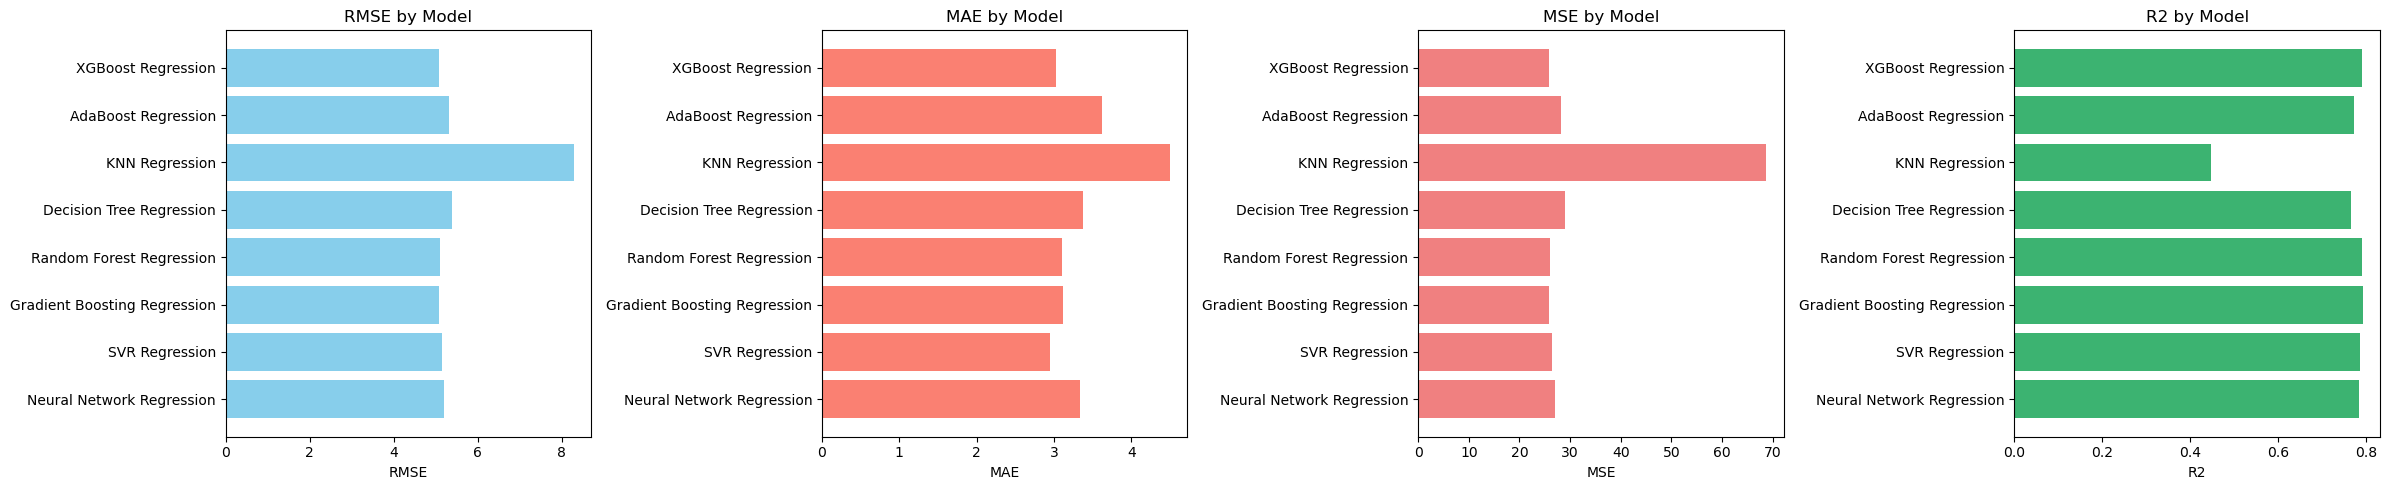

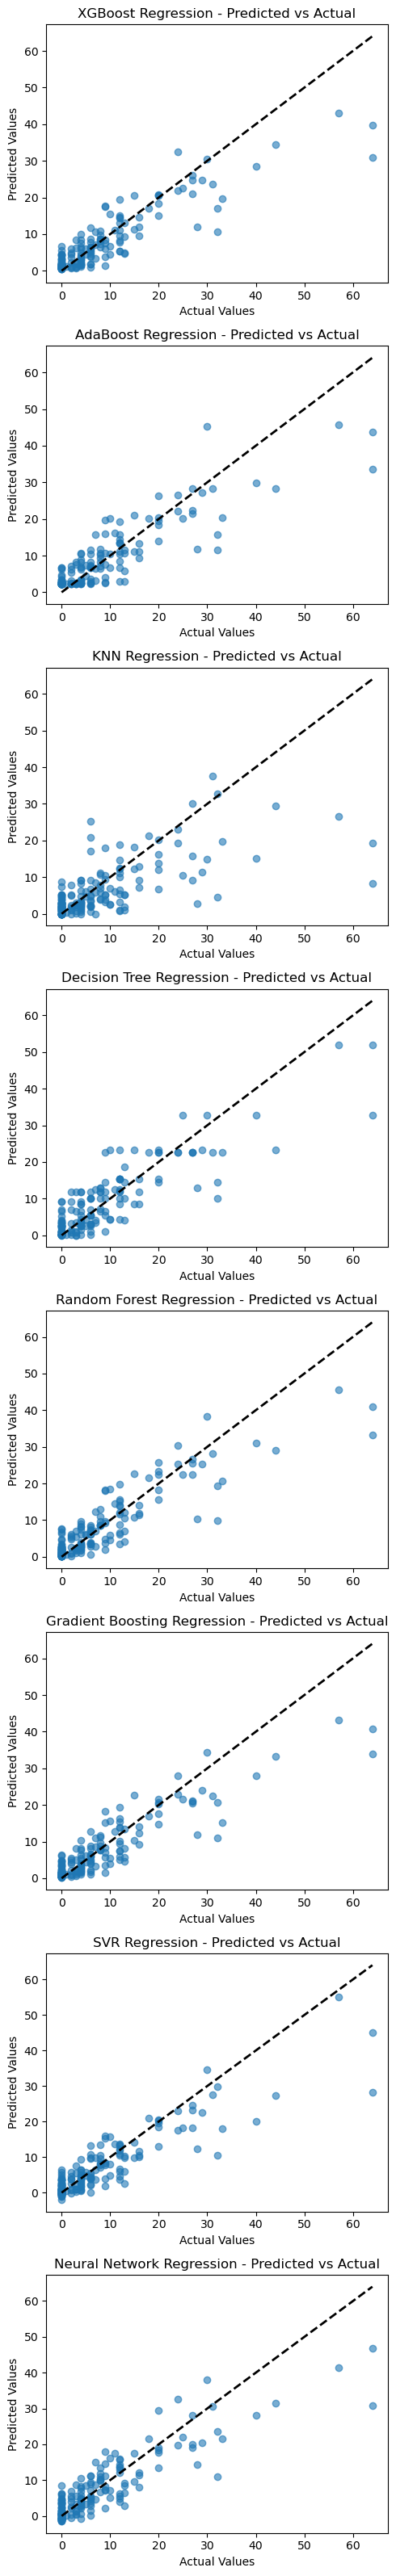

In [14]:
#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])


# Define models with the best parameters found

            
best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam'},
}
models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                 Feature  Importance
15             grduels_w    0.697170
25     betweenness2goals    0.125520
31           pos_role_ML    0.043819
12                 fouls    0.026459
14             grduels_l    0.025532
26          pos_role_AMC    0.021598
27          pos_role_AML    0.015770
20          shotsblocked    0.009093
28          pos_role_AMR    0.008027
32           pos_role_MR    0.004240
17          lballs_inacc    0.003277
13                 goals    0.002647
10          drib_success    0.002497
29          pos_role_DMR    0.002421
11         dribbled_past    0.002216
9           dangmistakes    0.002215
22               touches    0.001599
24  closeness_centrality    0.001409
8          crosses_inacc    0.001069
2              aerials_w    0.000997
7            crosses_acc    0.000865
18            passes_acc    0.000500
30           pos_role_MC    0.000377
16            lballs_acc    0.000354
6            countattack    0.000315
0         matches_played    0.000014
2

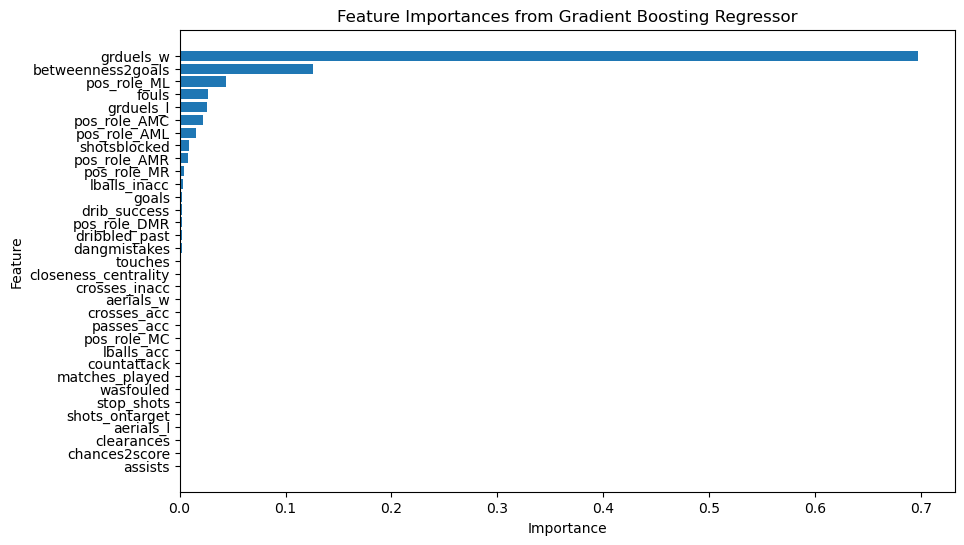

In [15]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.1
n_estimators = 50
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [17]:
X.shape

(942, 33)

In [16]:
#using subsets of features and performing parameter tunning it
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=50, learning_rate=0.1)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_20': feature_importances.index[:20],
    'top_30': feature_importances.index[:30]
}

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    }),
     (LinearRegression(), 'Linear Regression', {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [-1,2,3]
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

results = []

for subset_name, features in feature_subsets.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    for model, name, params in models:
        mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
        if best_model is not None:
            results.append({
                'Subset': subset_name,
                'Model': name,
                'MSE': f'{mse:.5f}',
                'MAE': f'{mae:.5f}',
                'RMSE': f'{rmse:.5f}',
                'R2 Score': f'{r2:.5f}',
                'Best Params': best_params,
                'Training Time (s)': f'{training_time:.5f}'
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model       MSE      MAE     RMSE R2 Score  \
0    top_5            XGBoost Regression  26.15578  2.86409  5.11427  0.73472   
1    top_5           AdaBoost Regression  26.58239  3.52215  5.15581  0.73039   
2    top_5                KNN Regression  24.50902  2.84051  4.95066  0.75142   
3    top_5      Decision Tree Regression  40.75677  3.70298  6.38410  0.58663   
4    top_5      Random Forest Regression  25.97336  2.94297  5.09641  0.73657   
5    top_5  Gradient Boosting Regression  23.35027  2.90836  4.83221  0.76317   
6    top_5                SVR Regression  23.36409  2.69873  4.83364  0.76303   
7    top_5     Neural Network Regression  21.15741  2.84485  4.59972  0.78541   
8    top_5             Linear Regression  21.87530  2.93286  4.67710  0.77813   
9   top_10            XGBoost Regression  23.39451  2.89120  4.83679  0.76272   
10  top_10           AdaBoost Regression  25.42673  3.26612  5.04249  0.74211   
11  top_10                KN

In [17]:
print(results_df[['Subset', 'Model', 'MSE',  'MAE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model       MSE      MAE R2 Score  \
0    top_5            XGBoost Regression  26.15578  2.86409  0.73472   
1    top_5           AdaBoost Regression  26.58239  3.52215  0.73039   
2    top_5                KNN Regression  24.50902  2.84051  0.75142   
3    top_5      Decision Tree Regression  40.75677  3.70298  0.58663   
4    top_5      Random Forest Regression  25.97336  2.94297  0.73657   
5    top_5  Gradient Boosting Regression  23.35027  2.90836  0.76317   
6    top_5                SVR Regression  23.36409  2.69873  0.76303   
7    top_5     Neural Network Regression  21.15741  2.84485  0.78541   
8    top_5             Linear Regression  21.87530  2.93286  0.77813   
9   top_10            XGBoost Regression  23.39451  2.89120  0.76272   
10  top_10           AdaBoost Regression  25.42673  3.26612  0.74211   
11  top_10                KNN Regression  25.95242  3.17821  0.73678   
12  top_10      Decision Tree Regression  45.41741  3.89688  0.5

In [18]:
#visualising the best subsets to use
import pandas as pd

# Assuming results_df is already defined and contains your results
# Convert only the metric columns to numeric values for averaging
metric_columns = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']
for col in metric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Group by subset and calculate the mean of each metric
subset_averages = results_df.groupby('Subset')[metric_columns].mean().reset_index()

# Display the averaged results
print(subset_averages)

   Subset        MSE       MAE      RMSE  R2 Score  Training Time (s)
0  top_10  25.172358  3.051043  4.973972  0.744691          16.563373
1  top_20  26.053826  3.143419  5.067526  0.735751          21.169587
2  top_30  26.913246  3.131494  5.135102  0.727034          26.823812
3   top_5  25.969377  3.028611  5.071547  0.736608          14.769344


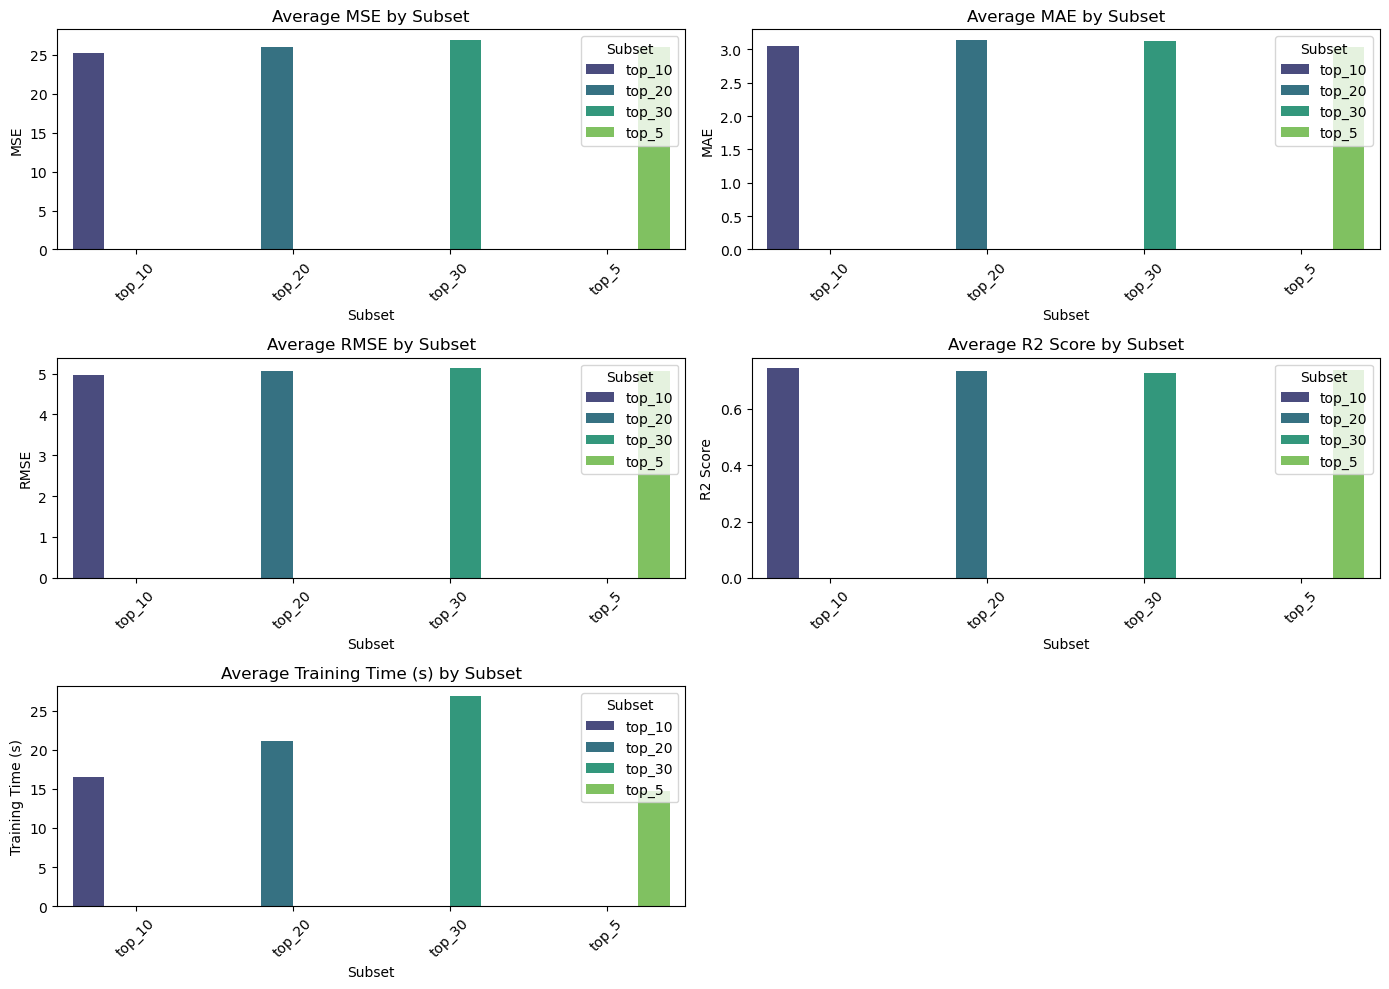

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Plotting the averages for each metric
metrics = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=subset_averages, x='Subset', y=metric, hue='Subset', palette='viridis')
    plt.title(f'Average {metric} by Subset')
    plt.xticks(rotation=45)

    
plt.tight_layout()
plt.show()

                          Model        MSE       MAE      RMSE        R2  \
0            XGBoost Regression  30.105197  3.369809  5.486820  0.757590   
1           AdaBoost Regression  26.900727  3.583781  5.186591  0.783393   
2                KNN Regression  30.988441  3.364790  5.566726  0.750478   
3      Decision Tree Regression  30.013654  3.516509  5.478472  0.758327   
4      Random Forest Regression  25.404551  3.142365  5.040293  0.795440   
5  Gradient Boosting Regression  22.331545  2.991088  4.725626  0.820184   
6                SVR Regression  27.927703  2.973486  5.284667  0.775123   
7     Neural Network Regression  21.960923  2.867964  4.686248  0.823168   

          R  
0  0.880093  
1  0.896619  
2  0.881181  
3  0.872367  
4  0.898506  
5  0.918406  
6  0.900602  
7  0.910434  


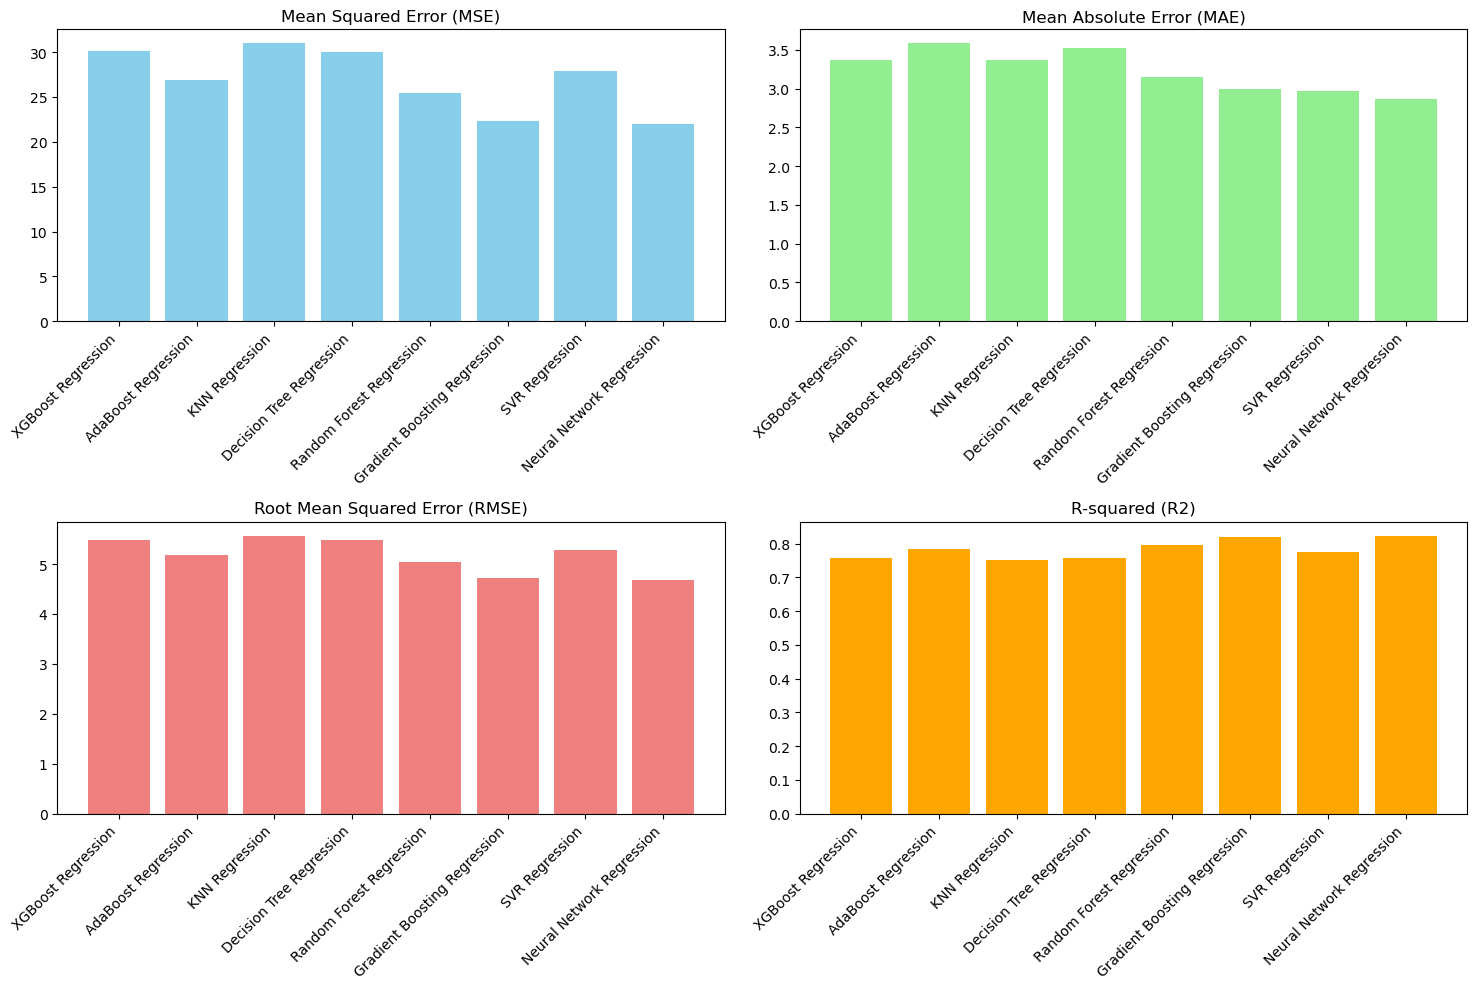

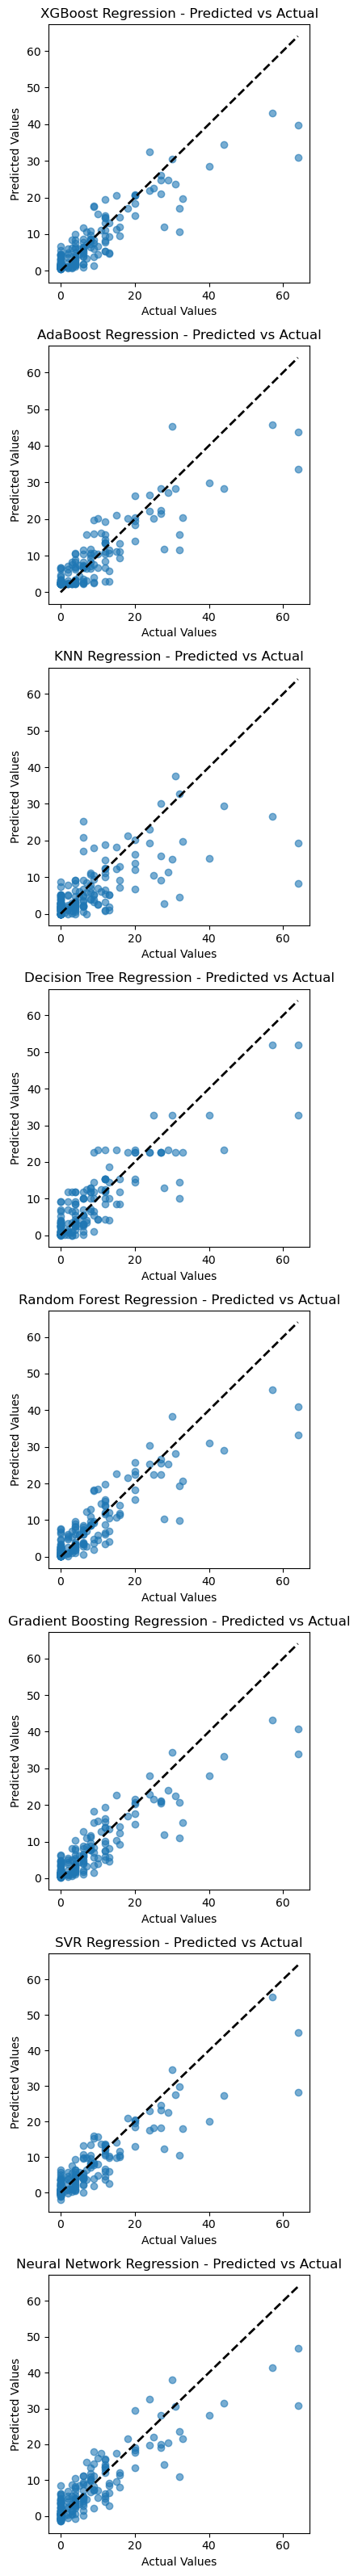

In [20]:
#using top 10 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 5},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':True, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

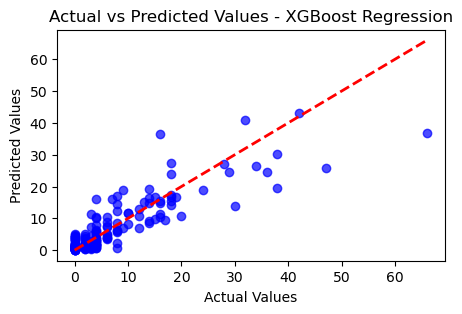

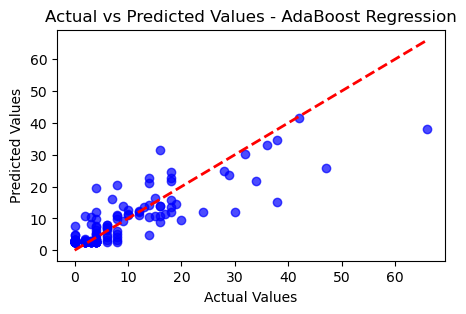

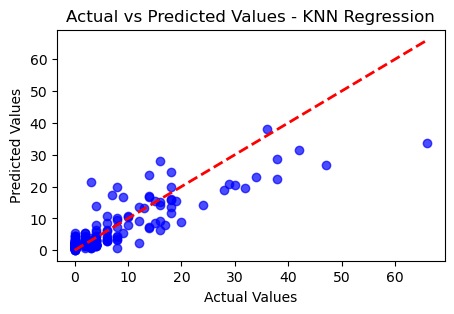

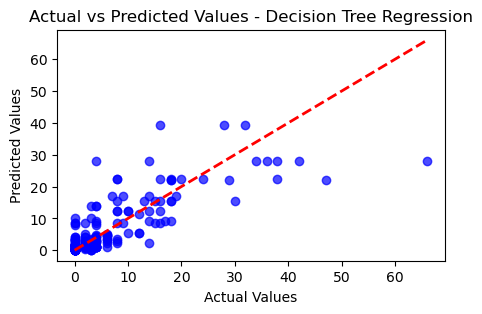

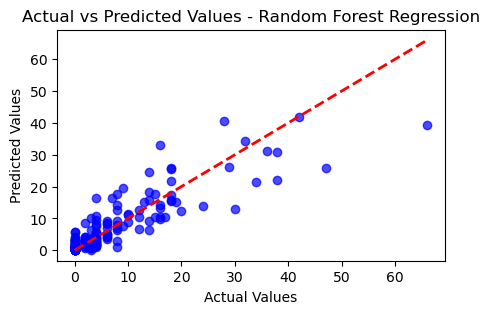

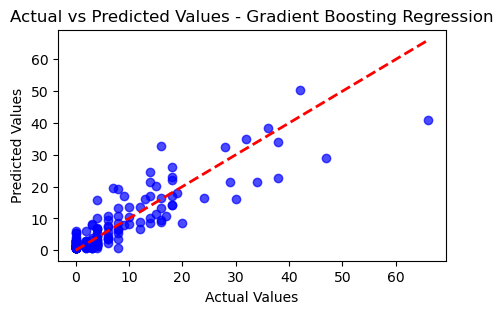

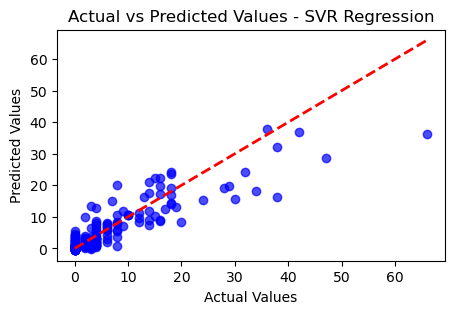

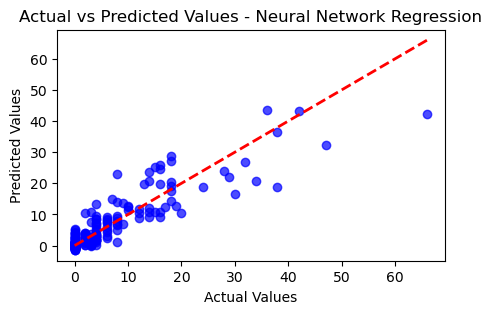

  Subset                         Model       MSE      MAE     RMSE       R2  \
0  top_5            XGBoost Regression  23.39451  2.89120  4.83679  0.76272   
1  top_5           AdaBoost Regression  25.77581  3.32183  5.07699  0.73857   
2  top_5                KNN Regression  25.95242  3.17821  5.09435  0.73678   
3  top_5      Decision Tree Regression  37.30871  3.49124  6.10809  0.62160   
4  top_5      Random Forest Regression  22.74278  2.84013  4.76894  0.76933   
5  top_5  Gradient Boosting Regression  21.07316  2.93494  4.59055  0.78627   
6  top_5                SVR Regression  22.33800  2.73322  4.72631  0.77344   
7  top_5     Neural Network Regression  20.46793  2.88555  4.52415  0.79241   

                                      Best Params Training Time (s)  
0     {'colsample_bytree': 1.0, 'subsample': 1.0}           3.73522  
1                              {'loss': 'square'}           2.29070  
2                               {'leaf_size': 10}           0.14375  
3       

In [21]:
#using more parameters to tune the top 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

    
# Define models with parameter grids for hyperparameter tuning
   

models = [
    (XGBRegressor(random_state=random_state,n_estimators=50,learning_rate=0.1,max_depth=5), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.1,n_estimators=100), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=7,weights='distance',algorithm='auto'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=10,min_samples_split=10), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=10,min_samples_split=2,n_estimators=50), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,max_depth=3,n_estimators=50), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=10,gamma='scale',kernel='linear'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (50,),activation='relu', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_5',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model        MSE       MAE      RMSE        R2  \
0            XGBoost Regression  30.105197  3.369809  5.486820  0.757590   
1           AdaBoost Regression  27.029166  3.614103  5.198958  0.782358   
2                KNN Regression  30.988441  3.364790  5.566726  0.750478   
3      Decision Tree Regression  26.639791  3.367011  5.161375  0.785494   
4      Random Forest Regression  25.404551  3.142365  5.040293  0.795440   
5  Gradient Boosting Regression  24.980025  3.083945  4.998002  0.798858   
6                SVR Regression  27.850580  2.965159  5.277365  0.775744   
7     Neural Network Regression  22.518059  2.971262  4.745320  0.818682   

          R  
0  0.880093  
1  0.897908  
2  0.881181  
3  0.886369  
4  0.898506  
5  0.909220  
6  0.900359  
7  0.906696  


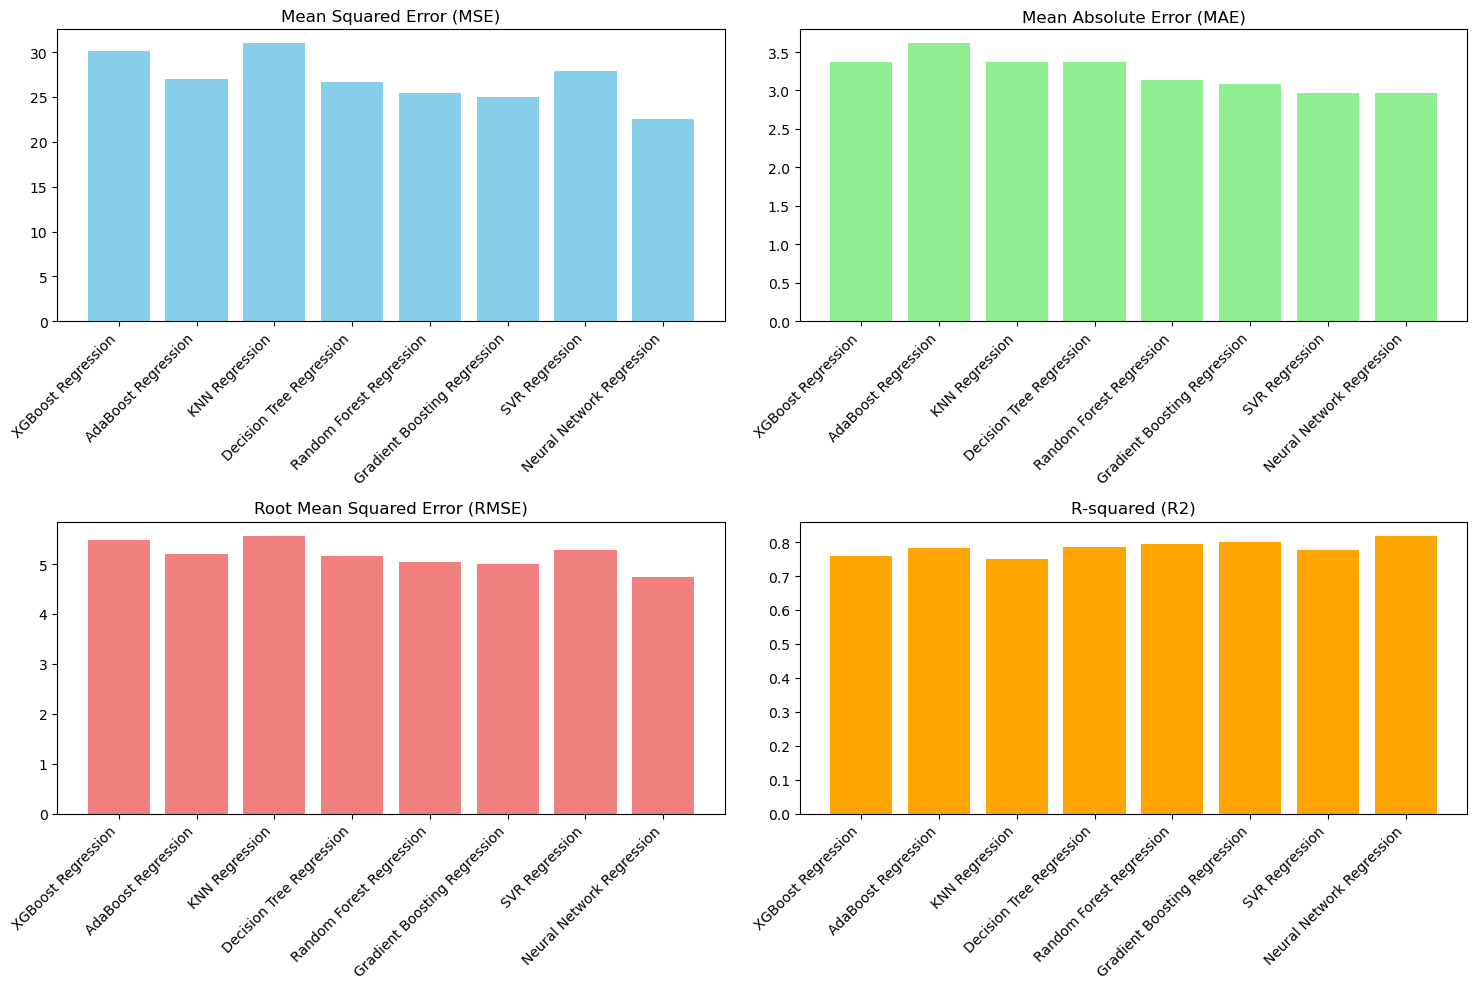

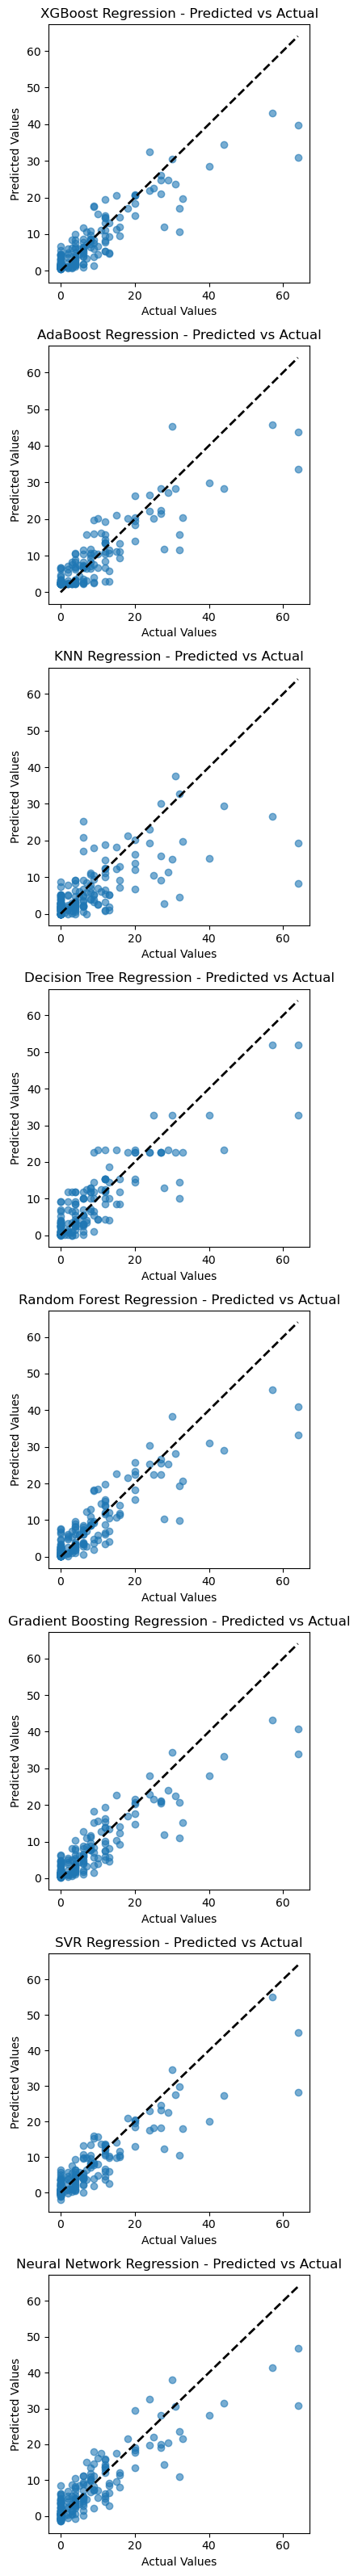

In [23]:
#using the MORE hyper-parameter tunning on the test set with 10 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:10]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found


best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 5,'colsample_bytree':1.0,'subsample':1.0},
    'AdaBoost Regression': {'n_estimators': 100, 'learning_rate': 0.1,'loss':'square'},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': 10, 'min_samples_split': 10,'min_samples_leaf':8},
    'Random Forest Regression': {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.8},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale','epsilon':0.05},
    'Neural Network Regression': {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam','alpha':0.001,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)